In [ ]:
# https://www.youtube.com/watch?v=jztwpsIzEGc&t=2575s (Image Detection)
# https://www.youtube.com/watch?v=B-1qwKvJI64&t=261s (ResNet 50)
# https://www.youtube.com/watch?v=JcU72smpLJk (ResNet 50)
# https://www.youtube.com/watch?v=B-1qwKvJI64&list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6&index=30 (Object Detection)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

sad


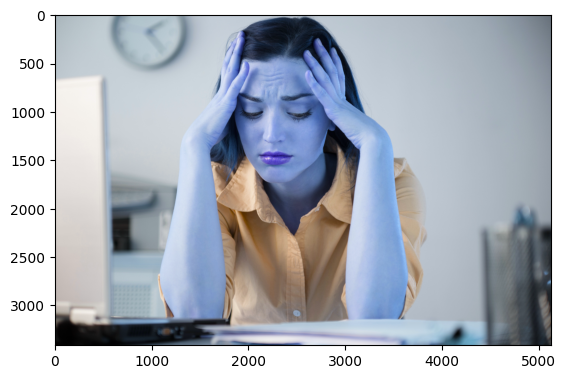

happy


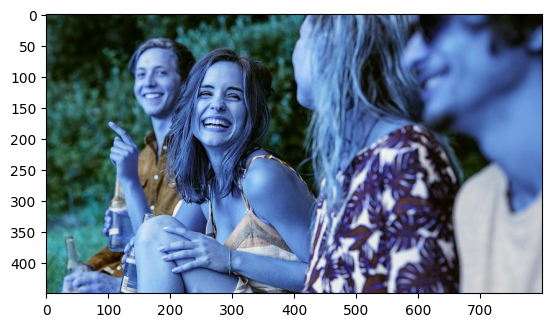

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

data_dir = '/content/drive/My Drive/Colab Notebooks/Emotion Detection/data'
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class))[:1]:
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)
        print(image_class)
        plt.imshow(img)
        plt.show()

In [26]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
data_dir = '/content/drive/My Drive/Colab Notebooks/Emotion Detection/data'

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 282 files belonging to 2 classes.


In [27]:
def preprocess_data(image, label):
    # We want the values to be between 0 and 1, so that the model performs better
    image = image/255
    return image, label

# Map the preprocess_data function to the dataset
data = data.map(preprocess_data)

In [28]:
scaled_data_iterator = data.as_numpy_iterator()
batch = scaled_data_iterator.next()

In [29]:
batch[0].shape

(32, 256, 256, 3)

0
1
2
3


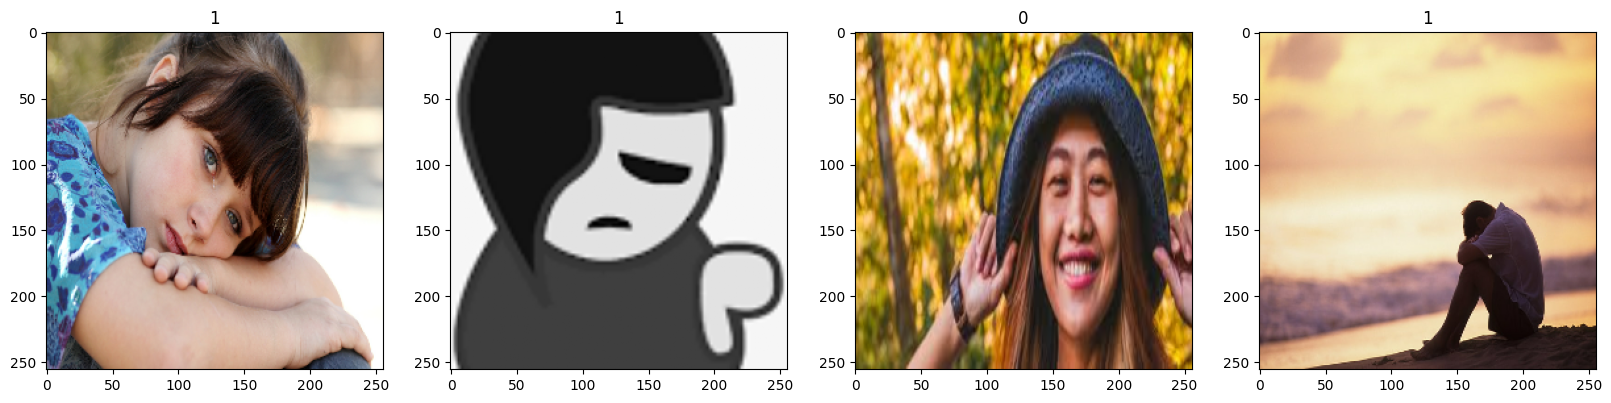

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])
  print(idx)

batch = scaled_data_iterator.next()

In [36]:
len(data)

9

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [40]:
train_size + val_size + test_size

9

In [41]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

In [42]:
batch[1].shape

(32,)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
hist = model.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
6/6 [==============================] - 21s 3s/step - loss: 0.7423 - accuracy: 0.5104 - val_loss: 0.7140 - val_accuracy: 0.4844
Epoch 2/25
6/6 [==============================] - 20s 3s/step - loss: 0.6638 - accuracy: 0.5729 - val_loss: 0.5885 - val_accuracy: 0.8594
Epoch 3/25
6/6 [==============================] - 25s 4s/step - loss: 0.5559 - accuracy: 0.7396 - val_loss: 0.3870 - val_accuracy: 0.9219
Epoch 4/25
6/6 [==============================] - 20s 3s/step - loss: 0.4058 - accuracy: 0.8333 - val_loss: 0.3950 - val_accuracy: 0.8594
Epoch 5/25
6/6 [==============================] - 20s 3s/step - loss: 0.5110 - accuracy: 0.7708 - val_loss: 0.4139 - val_accuracy: 0.8438
Epoch 6/25
6/6 [==============================] - 20s 3s/step - loss: 0.3084 - accuracy: 0.9010 - val_loss: 0.2322 - val_accuracy: 0.9531
Epoch 7/25
6/6 [==============================] - 20s 3s/step - loss: 0.2333 - accuracy: 0.9115 - val_loss: 0.2307 - val_accuracy: 0.9062
Epoch 8/25
6/6 [==================

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/Emotion Detection/emotion.keras')

In [51]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.models import load_model

pre = Precision()
re = Recall()
acc = Accuracy()

for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  yhat = [1 if val >= 0.5 else 0 for val in yhat]
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print(f'Precision: {pre.result().numpy()}\nRecall: {re.result().numpy()}\nAccuracy: {acc.result().numpy()}')


1/1 [==============================] - 1s 1s/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


### Test the model

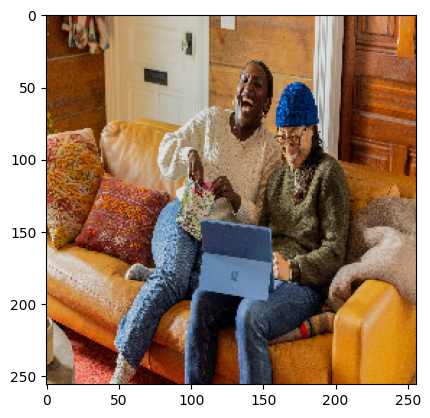

In [92]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Emotion Detection/img1.jpg')
# img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Emotion Detection/img2.png')

# Resize the image using TensorFlow
img_resized = tf.image.resize(img, (256, 256))

# Convert the TensorFlow tensor back to a NumPy array
img_resized_np = tf.make_ndarray(tf.make_tensor_proto(img_resized)).astype(np.uint8)

# Display the image
plt.imshow(cv2.cvtColor(img_resized_np, cv2.COLOR_BGR2RGB))
plt.show()


In [93]:
import numpy as np
yhat = model.predict(np.expand_dims(img_resized_np/255, 0))

1/1 [==============================] - 0s 80ms/step


In [94]:
yhat

array([[0.23931734]], dtype=float32)

In [95]:
idx = 1 if yhat >= 0.5 else 0
index_to_label = {0:'Happy', 1:'Sad'}

print(f'The image belongs to {index_to_label[idx]} class.')

The image belongs to Happy class.
